# EDA of Cleaned Telemetry and Ergast database information

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scripts import ds_ultils
import plotly.express as px
from scripts.f1_ultils import *

In [2]:
qualifying_data=pd.read_csv('./data/clean/years_18_19_telemetry_subsetcircuits_cleaned.csv')

In [3]:
qualifying_df= qualifying_data.copy()

The qualifying data is on a delta time per lap record basis, we need to aggregate it to a record per qualifying, circuit and driver combination

To do this we do feature engineering to generate features which tell us about the circuit characteristics, driver characteristics and car characteristics.



## Data dictionary:

- `raceId`(float) : id of the race linked to Ergast database
- `year` (float) : year of the Grand Prix
- `name` (float) : name of the Grand Prix
- `date` (float) : date of the qualifying session
- `time` (float) : Time of the qualifying session
- `lat_x` (float) : Latitude of the circuit
- `lng_x` (float) : Longitude of the circuit
- `circuitRef` (object) : circuit name
- `country` (object) : country name
- `alt` (float) : altitude of the circuit
- `qualifyId` (float) : id of qualifying session
- `quali_position` (float) : position of qualifying
- `positionOrder`(float) : position of race
- `points` (float) : points from race
- `points_drivers` (float): cumulative points of the session
- `position_drivers` (float): position in drivers season standing after the race
- `wins_drivers` (float) : number of wins that season
- `points_constructors` (float) : number of points the constructors have in the standings
- `position_constructors` (float) : position in constructors standings after the race
- `wins_constructors` (float) : number of constructors wins that season
- `points_constructor_ind_races` (float) : points gained in that race constructors
- `driverRef` (object) : Name of driver
- `nationality_drivers` (object) : Nationality of driver
- `constructorRef` (object) : Constructor name
- `nationality_constructors` (object) : Nationality of constructors
- `qualifying_lapId` (float) : Id of individual lap 
- `qualifying_end_lap_sessiontime` (pandas.Timedelta): Session time when the lap time was set (end of lap) 
- `qualifying_DriverNumber` (object) : Driver number
- `qualifying_LapTime` (pandas.Timedelta): Recorded lap time. 
- `qualifying_Sector1Time` (pandas.Timedelta): Sector 1 recorded time
- `qualifying_Sector2Time` (pandas.Timedelta): Sector 2 recorded time
- `qualifying_Sector3Time` (pandas.Timedelta): Sector 3 recorded time
- `qualifying_LapNumber` Recorded lap number
- `qualifying_SpeedI1` (float): Speedtrap sector 1 [km/h]
- `qualifying_SpeedI2`(float): Speedtrap sector 2 [km/h]
- `qualifying_SpeedFL` (float): Speedtrap at finish line [km/h]
- `qualifying_SpeedST`(float): Speedtrap on longest straight (Not sure) [km/h]
- `qualifying_IsPersonalBest` (bool) : Flag that indicates whether this lap is the official personal best lap of a driver. If any lap of a driver is quicker than their respective personal best lap, this means that the quicker lap is invalid and not counted. This can happen it the track limits were execeeded, for example.
- `qualifying_Compound` (object): Tyres event specific compound name: SOFT, MEDIUM, HARD, INTERMEDIATE, WET (the actual underlying compounds C1 to C5 are not differentiated).
- `qualifying_TyreLife` (float): Laps driven on this tire (includes laps in other sessions for used sets of tires)
- `qualifying_FreshTyre` (bool): Tyre had TyreLife=0 at stint start, i.e. was a new tire
- `qualifying_Stint` (int): Stint number
- `qualifying_TrackStatus` A string that contains track status numbers for all track status that occurred during this lap. ‘1’: Track clear (beginning of session ot to indicate the end of another status)
‘2’: Yellow flag (sectors are unknown)
‘4’: Safety Car
‘5’: Red Flag
‘6’: Virtual Safety Car deployed
‘7’: Virtual Safety Car ending 
- `qualifying_IsAccurate`(bool) Indicates that the lap start and end time are synced correctly with other laps. 
- `qualifying_LapStartDate` : (pandas.datetime): Timestamp at the start of the lap
- `qualifying_AirTemp` (float): Air temperature [°C]
- `qualifying_Humidity` (float): Relative humidity [%]
- `qualifying_Pressure` (float): Air pressure [mbar]
- `qualifying_Rainfall` (bool): Shows if there is rainfall 
- `qualifying_TrackTemp`  (float): Track temperature [°C]
- `qualifying_WindDirection` (int): Wind direction [°] (0°-359°)
- `qualifying_WindSpeed` (float): Wind speed [km/h]
- `qualifying_DistanceToDriverAhead` Distance to driver ahead  
- `qualifying_lap_timedelta` : (timedelta): Time (0 is start of the data slice)
- `qualifying_RPM` (int): Car RPM
- `qualifying_Speed` (float): Car speed [km/h]
- `qualifying_nGear`(int): Car gear number
- `qualifying_Throttle`(float): 0-100 Throttle pedal pressure [%]
- `qualifying_Brake`(bool): Brakes are applied or not.
- `qualifying_DRS`(int): DRS indicator 0 = Off
1 = Off
2 = (?)
3 = (?)
8 = Detected, Eligible once in Activation Zone (Noted Sometimes)
10 = On (Unknown Distinction)
12 = On (Unknown Distinction)
14 = On (Unknown Distinction)
- `qualifying_Source` (str): Flag indicating how this sample was created:
‘car’: sample from original api car data
‘pos’: sample from original api position data
‘interpolated’: this sample was artificially created; all values are computed/interpolated
- `qualifying_Distance` Distance driven between two samples
- `qualifying_RelativeDistance` distance driven since the first sampl
- `qualifying_Status` Flag - OffTrack/OnTrack 
- `qualifying_X` X position [1/10 m]
- `qualifying_Y` Y position [1/10 m]
- `qualifying_Z` Z position [1/10 m]
- `fastest_lap_milliseconds` (float) offical qualifying time in milliseconds
- `age` (float) age of driver



In [4]:
qualifying_df.columns

Index(['raceId', 'year', 'name', 'date', 'time', 'lat_x', 'lng_x',
       'circuitRef', 'country', 'alt', 'qualifyId', 'quali_position',
       'positionOrder', 'points', 'points_drivers', 'position_drivers',
       'wins_drivers', 'points_constructors', 'position_constructors',
       'wins_constructors', 'points_constructor_ind_races', 'driverRef',
       'nationality_drivers', 'constructorRef', 'nationality_constructors',
       'qualifying_lapId', 'qualifying_end_lap_sessiontime',
       'qualifying_DriverNumber', 'qualifying_LapTime', 'qualifying_LapNumber',
       'qualifying_Sector1Time', 'qualifying_Sector2Time',
       'qualifying_Sector3Time', 'qualifying_SpeedI1', 'qualifying_SpeedI2',
       'qualifying_SpeedFL', 'qualifying_SpeedST', 'qualifying_IsPersonalBest',
       'qualifying_Compound', 'qualifying_TyreLife', 'qualifying_FreshTyre',
       'qualifying_Stint', 'qualifying_TrackStatus', 'qualifying_IsAccurate',
       'qualifying_LapStartDate', 'qualifying_AirTemp', 'qu

In [4]:
grouby=(qualifying_df.groupby(['raceId','driverRef'])['qualifying_LapTime'].min()*1000).unstack()
races = qualifying_df['raceId'].unique()
for race in races:
    print(race)
    drivers = qualifying_df.loc[qualifying_df['raceId'] == race,'driverRef'].unique()
    for driver in drivers:
        query= (qualifying_df['raceId'] == race) & (qualifying_df['driverRef'] == driver)
        qualifying_df.loc[query,'fastest_lap_milliseconds_clean'] = grouby.loc[race,driver]

997
1004
1000
994
993
1018
1025
1021
1015
1014


In [6]:
#plot top two times telemetry for grand prix 1

query = (qualifying_df['positionOrder'].isin([1,2])) & (qualifying_df['raceId']==997) & ((qualifying_df['qualifying_LapTime']*1000)==qualifying_df['fastest_lap_milliseconds']) 
austrain_top_2_laps = qualifying_df[query].copy()

In [7]:
austrain_top_2_laps['driverRef'].unique()

array(['raikkonen', 'max_verstappen'], dtype=object)

In [8]:
px.line(data_frame=austrain_top_2_laps,
x='qualifying_lap_timedelta',
y='qualifying_Speed',
color='driverRef')

In [9]:
data_temp=austrain_top_2_laps.copy()
data_temp.loc[austrain_top_2_laps['driverRef']=='max_verstappen','qualifying_X']= data_temp.loc[austrain_top_2_laps['driverRef']=='max_verstappen','qualifying_X'].apply(lambda x:x+10000)

In [10]:
#data = austrain_top_2_laps[austrain_top_2_laps['driverRef']=='raikkonen']
px.scatter(data_frame=data_temp,
x='qualifying_X',
y='qualifying_Y',
color='qualifying_Speed'
)

C:\Users\ben44\AppData\Local\Temp\ipykernel_9668\1428571343.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

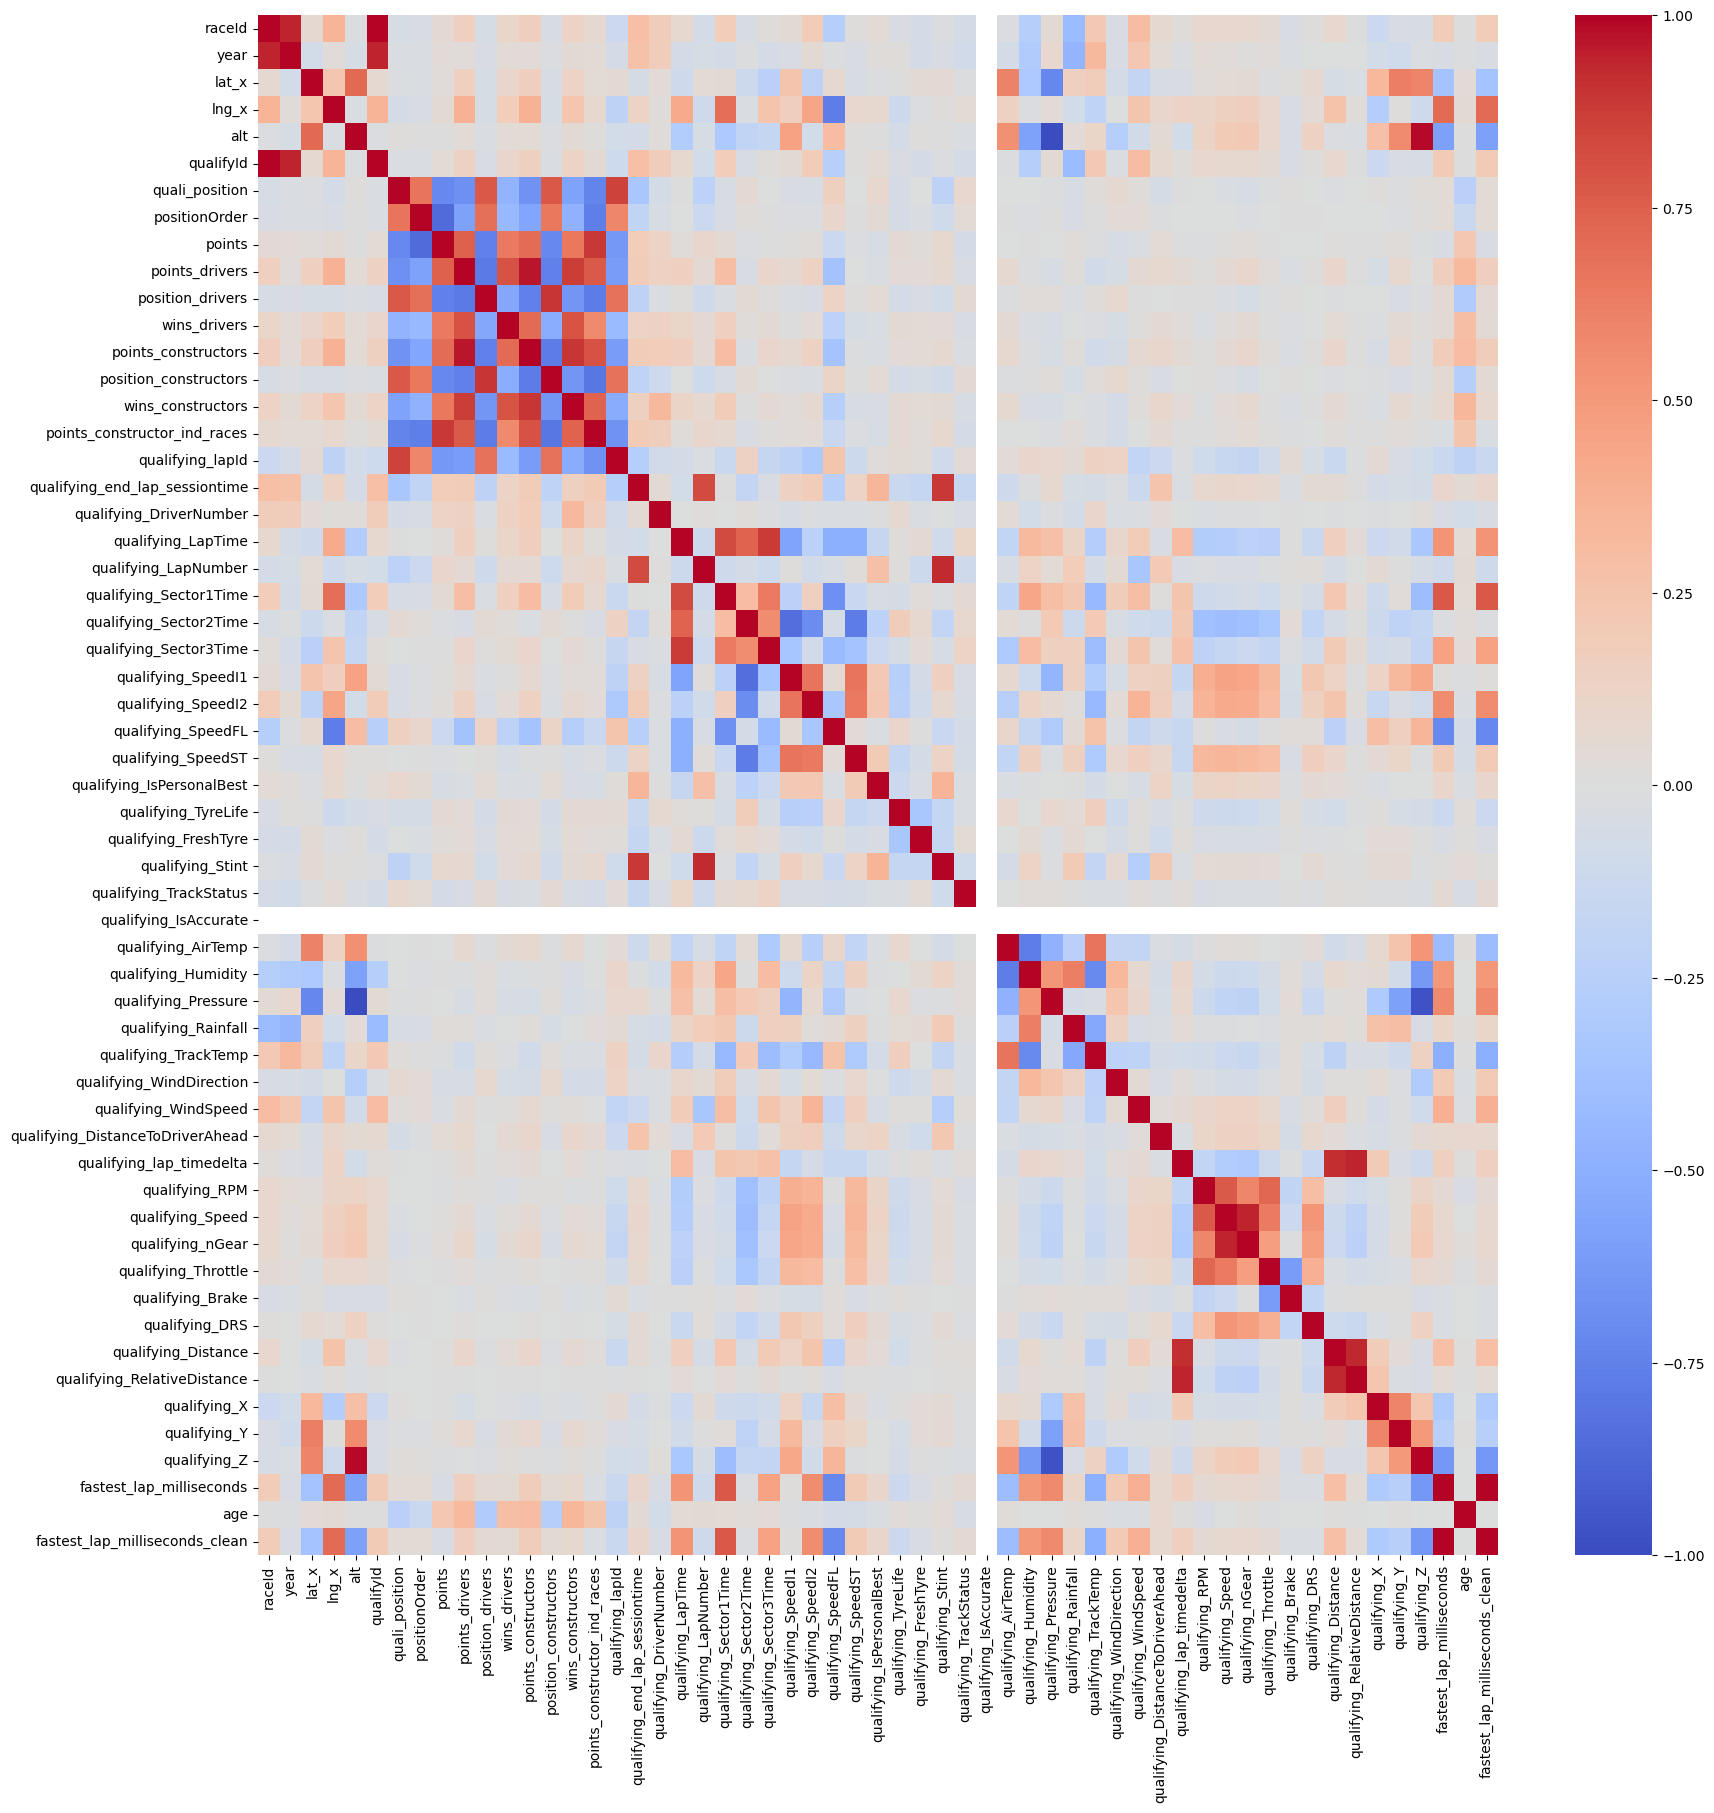

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(qualifying_df.corr(), cmap='coolwarm', vmin=-1, vmax=+1)

## Find corners in a lap

In [12]:
raikkonen_aut=qualifying_df[(qualifying_df['driverRef'] =='raikkonen') &(qualifying_df['raceId']==1018)].copy()

In [13]:
raikkonen_aut['qualifying_lapId'].unique()


array([60., 61., 62., 63., 64., 65., 66., 67., 68., 69., 70.])

In [14]:
test=raikkonen_aut[raikkonen_aut['qualifying_lapId'] == 69]
test

,raceId,year,name,date,time,lat_x,lng_x,circuitRef,country,alt,...,qualifying_Source,qualifying_Distance,qualifying_RelativeDistance,qualifying_Status,qualifying_X,qualifying_Y,qualifying_Z,fastest_lap_milliseconds,age,fastest_lap_milliseconds_clean
575685,1018,2019,Austrian Grand Prix,2019-06-29,13:10:00,47.2197,14.7647,red_bull_ring,Austria,678.0,...,interpolation,0.060653,0.000014,OnTrack,1416.0,-1098.0,7215.0,64056.0,39.0,64056.0
575686,1018,2019,Austrian Grand Prix,2019-06-29,13:10:00,47.2197,14.7647,red_bull_ring,Austria,678.0,...,car,5.192222,0.001198,OnTrack,1365.0,-1112.0,7215.0,64056.0,39.0,64056.0
575687,1018,2019,Austrian Grand Prix,2019-06-29,13:10:00,47.2197,14.7647,red_bull_ring,Austria,678.0,...,pos,15.166084,0.003501,OnTrack,1272.0,-1137.0,7215.0,64056.0,39.0,64056.0
575688,1018,2019,Austrian Grand Prix,2019-06-29,13:10:00,47.2197,14.7647,red_bull_ring,Austria,678.0,...,car,25.192222,0.005815,OnTrack,1185.0,-1160.0,7214.0,64056.0,39.0,64056.0
575689,1018,2019,Austrian Grand Prix,2019-06-29,13:10:00,47.2197,14.7647,red_bull_ring,Austria,678.0,...,pos,40.239493,0.009288,OnTrack,1060.0,-1194.0,7214.0,64056.0,39.0,64056.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576167,1018,2019,Austrian Grand Prix,2019-06-29,13:10:00,47.2197,14.7647,red_bull_ring,Austria,678.0,...,car,4296.272778,0.991667,OnTrack,1814.0,-992.0,7215.0,64056.0,39.0,64056.0
576168,1018,2019,Austrian Grand Prix,2019-06-29,13:10:00,47.2197,14.7647,red_bull_ring,Austria,678.0,...,pos,4302.826559,0.993179,OnTrack,1749.0,-1010.0,7215.0,64056.0,39.0,64056.0
576169,1018,2019,Austrian Grand Prix,2019-06-29,13:10:00,47.2197,14.7647,red_bull_ring,Austria,678.0,...,car,4312.576111,0.995430,OnTrack,1633.0,-1040.0,7214.0,64056.0,39.0,64056.0
576170,1018,2019,Austrian Grand Prix,2019-06-29,13:10:00,47.2197,14.7647,red_bull_ring,Austria,678.0,...,pos,4327.388177,0.998849,OnTrack,1450.0,-1090.0,7215.0,64056.0,39.0,64056.0


In [15]:
test = flag_corners(test,curvature=0.0005,interval=10,smoothing=10)

c:\Users\ben44\Documents\BEN\Brain_Station\Capstone_Project\Formula_1\scripts\f1_ultils.py:68: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot: xlabel='qualifying_X', ylabel='qualifying_Y'>

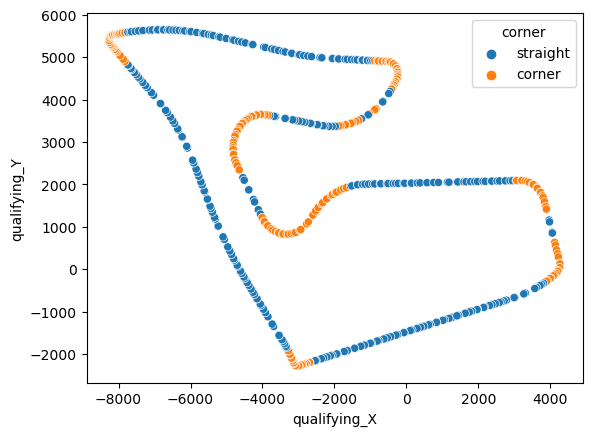

In [16]:
sns.scatterplot(data=test,x='qualifying_X',y='qualifying_Y',hue='corner')

In [17]:
qualifying_df

,raceId,year,name,date,time,lat_x,lng_x,circuitRef,country,alt,...,qualifying_Source,qualifying_Distance,qualifying_RelativeDistance,qualifying_Status,qualifying_X,qualifying_Y,qualifying_Z,fastest_lap_milliseconds,age,fastest_lap_milliseconds_clean
0,997,2018,Austrian Grand Prix,2018-06-30,13:10:00,47.2197,14.76470,red_bull_ring,Austria,678.0,...,interpolation,0.016388,0.000004,OnTrack,1461.0,-1086.0,7215.0,63130.0,28.0,63130.0
1,997,2018,Austrian Grand Prix,2018-06-30,13:10:00,47.2197,14.76470,red_bull_ring,Austria,678.0,...,pos,11.940577,0.002755,OnTrack,1334.0,-1121.0,7215.0,63130.0,28.0,63130.0
2,997,2018,Austrian Grand Prix,2018-06-30,13:10:00,47.2197,14.76470,red_bull_ring,Austria,678.0,...,car,15.519444,0.003581,OnTrack,1297.0,-1130.0,7214.0,63130.0,28.0,63130.0
3,997,2018,Austrian Grand Prix,2018-06-30,13:10:00,47.2197,14.76470,red_bull_ring,Austria,678.0,...,car,35.119444,0.008104,OnTrack,1109.0,-1180.0,7214.0,63130.0,28.0,63130.0
4,997,2018,Austrian Grand Prix,2018-06-30,13:10:00,47.2197,14.76470,red_bull_ring,Austria,678.0,...,pos,36.348883,0.008388,OnTrack,1098.0,-1184.0,7214.0,63130.0,28.0,63130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005379,1014,2019,Spanish Grand Prix,2019-05-11,13:10:00,41.5700,2.26111,catalunya,Spain,109.0,...,car,4592.136389,0.988236,OnTrack,1201.0,115.0,1706.0,80254.0,34.0,80254.0
1005380,1014,2019,Spanish Grand Prix,2019-05-11,13:10:00,41.5700,2.26111,catalunya,Spain,109.0,...,car,4608.216389,0.991696,OnTrack,1091.0,-56.0,1707.0,80254.0,34.0,80254.0
1005381,1014,2019,Spanish Grand Prix,2019-05-11,13:10:00,41.5700,2.26111,catalunya,Spain,109.0,...,pos,4611.342726,0.992369,OnTrack,1068.0,-92.0,1708.0,80254.0,34.0,80254.0
1005382,1014,2019,Spanish Grand Prix,2019-05-11,13:10:00,41.5700,2.26111,catalunya,Spain,109.0,...,car,4627.483056,0.995842,OnTrack,942.0,-288.0,1707.0,80254.0,34.0,80254.0


In [5]:
races = qualifying_df['raceId'].unique()
for race in races:
    lapIds = qualifying_df.loc[qualifying_df['raceId'] == race,'qualifying_lapId'].unique()
    for lap in lapIds:
        qualifying_df.loc[(qualifying_df['raceId'] == race) & (qualifying_df['qualifying_lapId']==lap),'corner']= (flag_corners(qualifying_df[(qualifying_df['raceId'] == race) & (qualifying_df['qualifying_lapId']==lap)].copy(),smoothing=10))['corner']


In [6]:
qualifying_df['raceId'].unique()

array([ 997, 1004, 1000,  994,  993, 1018, 1025, 1021, 1015, 1014],
      dtype=int64)

In [7]:
val = qualifying_df[(qualifying_df['raceId'] == 1015) & (qualifying_df['driverRef'] == 'raikkonen')]

<AxesSubplot: xlabel='qualifying_X', ylabel='qualifying_Y'>

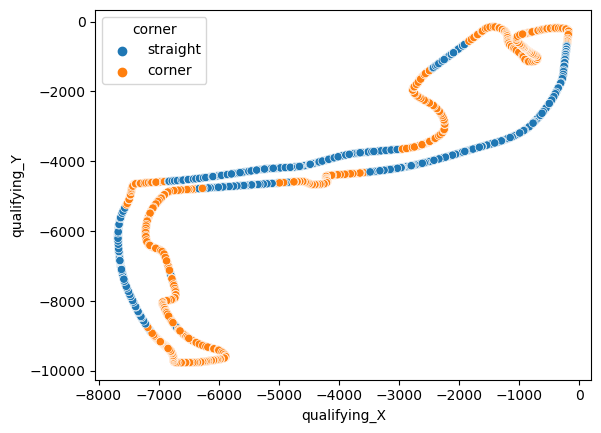

In [8]:
sns.scatterplot(data=val,x='qualifying_X',y='qualifying_Y',hue='corner')

## Circuit Length

In [9]:
qualifying_df['raceId'].unique()

array([ 997, 1004, 1000,  994,  993, 1018, 1025, 1021, 1015, 1014],
      dtype=int64)

In [10]:
test = qualifying_df[qualifying_df['raceId'] == 1000]

In [11]:
lapIds = test['qualifying_lapId'].unique()

In [12]:
lengths=[]
for lap in lapIds:
    lap_min = (test.loc[test['qualifying_lapId'] ==lap,'qualifying_Distance'].min())
    lap_max = (test.loc[test['qualifying_lapId'] ==lap,'qualifying_Distance'].max())
    lengths.append(lap_max-lap_min)
int(np.mean(lengths))

4366

In [13]:
qualifying_aggr = qualifying_df.groupby(['raceId','driverRef', 'circuitRef', 'country','nationality_drivers', 'constructorRef', 'nationality_constructors',])['year', 'name', 'date', 'time', 'lat_x', 'lng_x',
        'alt', 'qualifyId', 'quali_position',
       'positionOrder', 'points', 'points_drivers', 'position_drivers',
       'wins_drivers', 'points_constructors', 'position_constructors',
       'wins_constructors', 'points_constructor_ind_races', 'age','fastest_lap_milliseconds','fastest_lap_milliseconds_clean'].mean()

C:\Users\ben44\AppData\Local\Temp\ipykernel_28472\2017904845.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  qualifying_aggr = qualifying_df.groupby(['raceId','driverRef', 'circuitRef', 'country','nationality_drivers', 'constructorRef', 'nationality_constructors',])['year', 'name', 'date', 'time', 'lat_x', 'lng_x',
C:\Users\ben44\AppData\Local\Temp\ipykernel_28472\2017904845.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  qualifying_aggr = qualifying_df.groupby(['raceId','driverRef', 'circuitRef', 'country','nationality_drivers', 'constructorRef', 'nationality_constructors',])['year', 'name', 'date', 'time', 'lat_x', 'lng_x',


In [14]:
qualifying_aggr = qualifying_aggr.reset_index()

In [15]:
races = qualifying_df['raceId'].unique()
for race in races:
    print(race)
    lapIds = qualifying_df.loc[qualifying_df['raceId'] == race,'qualifying_lapId'].unique()
    
    lengths=[]
    for lap in lapIds:
        lap_min = (qualifying_df.loc[(qualifying_df['raceId'] == race) & (qualifying_df['qualifying_lapId'] ==lap),'qualifying_Distance'].min())
        lap_max = (qualifying_df.loc[(qualifying_df['raceId'] == race) & (qualifying_df['qualifying_lapId'] ==lap),'qualifying_Distance'].max())
        lengths.append(lap_max-lap_min)
    qualifying_aggr.loc[qualifying_aggr['raceId'] == race,'circuit_length'] = int(np.mean(lengths))

997
1004
1000
994
993
1018
1025
1021
1015
1014


In [16]:
qualifying_aggr

,raceId,driverRef,circuitRef,country,nationality_drivers,constructorRef,nationality_constructors,year,lat_x,lng_x,...,points_drivers,position_drivers,wins_drivers,points_constructors,position_constructors,wins_constructors,points_constructor_ind_races,age,fastest_lap_milliseconds,circuit_length
0,993,alonso,catalunya,Spain,Spain,mclaren,UK,2018.0,41.5700,2.26111,...,32.0,7.0,0.0,40.0,5.0,0.0,4.0,36.0,77721.0,4618.0
1,993,bottas,catalunya,Spain,Finland,mercedes,Germany,2018.0,41.5700,2.26111,...,58.0,3.0,0.0,153.0,1.0,2.0,43.0,28.0,76213.0,4618.0
2,993,ericsson,catalunya,Spain,Sweden,sauber,Switzerland,2018.0,41.5700,2.26111,...,2.0,16.0,0.0,11.0,9.0,0.0,1.0,27.0,79493.0,4618.0
3,993,gasly,catalunya,Spain,France,toro_rosso,Italy,2018.0,41.5700,2.26111,...,12.0,12.0,0.0,13.0,8.0,0.0,0.0,22.0,78463.0,4618.0
4,993,grosjean,catalunya,Spain,France,haas,USA,2018.0,41.5700,2.26111,...,0.0,19.0,0.0,19.0,6.0,0.0,8.0,32.0,77699.0,4618.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,1025,ricciardo,sochi,Russia,Australia,renault,France,2019.0,43.4057,39.95780,...,34.0,10.0,0.0,68.0,5.0,0.0,1.0,30.0,93661.0,5825.0
193,1025,russell,sochi,Russia,UK,williams,UK,2019.0,43.4057,39.95780,...,0.0,20.0,0.0,1.0,10.0,0.0,0.0,21.0,95356.0,5825.0
194,1025,sainz,sochi,Russia,Spain,mclaren,UK,2019.0,43.4057,39.95780,...,66.0,7.0,0.0,101.0,4.0,0.0,12.0,25.0,93222.0,5825.0
195,1025,stroll,sochi,Russia,Canada,racing_point,UK,2019.0,43.4057,39.95780,...,19.0,16.0,0.0,52.0,7.0,0.0,6.0,20.0,94233.0,5825.0


## Circuit Straight Characteristics

In [17]:
races = qualifying_df['raceId'].unique()
for race in races:
    print(race)
    lapIds = qualifying_df.loc[qualifying_df['raceId'] == race,'qualifying_lapId'].unique()
    
    total_=[]
    mean_=[]
    max_=[]
    for lap in lapIds:
        lap_query=(qualifying_df['raceId']==race)& (qualifying_df['qualifying_lapId'] == lap)
        if qualifying_df.loc[lap_query,'qualifying_TrackStatus'].all() == 1:
            total_straight, mean_straight, max_straight = straight_lengths(qualifying_df[lap_query].copy())
            total_.append(total_straight)
            mean_.append(mean_straight)
            max_.append(max_straight)
    qualifying_aggr.loc[qualifying_aggr['raceId'] == race,'circuit_total_straight'] = int(np.mean(total_))
    qualifying_aggr.loc[qualifying_aggr['raceId'] == race,'circuit_mean_straight'] = int(np.mean(mean_))
    qualifying_aggr.loc[qualifying_aggr['raceId'] == race,'circuit_max_straight'] = int(np.mean(max_))

997
1004
1000
994
993
1018
1025
1021
1015
1014


In [18]:
qualifying_aggr

,raceId,driverRef,circuitRef,country,nationality_drivers,constructorRef,nationality_constructors,year,lat_x,lng_x,...,points_constructors,position_constructors,wins_constructors,points_constructor_ind_races,age,fastest_lap_milliseconds,circuit_length,circuit_total_straight,circuit_mean_straight,circuit_max_straight
0,993,alonso,catalunya,Spain,Spain,mclaren,UK,2018.0,41.5700,2.26111,...,40.0,5.0,0.0,4.0,36.0,77721.0,4618.0,2348.0,207.0,779.0
1,993,bottas,catalunya,Spain,Finland,mercedes,Germany,2018.0,41.5700,2.26111,...,153.0,1.0,2.0,43.0,28.0,76213.0,4618.0,2348.0,207.0,779.0
2,993,ericsson,catalunya,Spain,Sweden,sauber,Switzerland,2018.0,41.5700,2.26111,...,11.0,9.0,0.0,1.0,27.0,79493.0,4618.0,2348.0,207.0,779.0
3,993,gasly,catalunya,Spain,France,toro_rosso,Italy,2018.0,41.5700,2.26111,...,13.0,8.0,0.0,0.0,22.0,78463.0,4618.0,2348.0,207.0,779.0
4,993,grosjean,catalunya,Spain,France,haas,USA,2018.0,41.5700,2.26111,...,19.0,6.0,0.0,8.0,32.0,77699.0,4618.0,2348.0,207.0,779.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,1025,ricciardo,sochi,Russia,Australia,renault,France,2019.0,43.4057,39.95780,...,68.0,5.0,0.0,1.0,30.0,93661.0,5825.0,3595.0,264.0,1161.0
193,1025,russell,sochi,Russia,UK,williams,UK,2019.0,43.4057,39.95780,...,1.0,10.0,0.0,0.0,21.0,95356.0,5825.0,3595.0,264.0,1161.0
194,1025,sainz,sochi,Russia,Spain,mclaren,UK,2019.0,43.4057,39.95780,...,101.0,4.0,0.0,12.0,25.0,93222.0,5825.0,3595.0,264.0,1161.0
195,1025,stroll,sochi,Russia,Canada,racing_point,UK,2019.0,43.4057,39.95780,...,52.0,7.0,0.0,6.0,20.0,94233.0,5825.0,3595.0,264.0,1161.0


## Circuit Corner Characteristics

In [23]:
races = qualifying_df['raceId'].unique()
for race in races:
    print(race)
    lapIds = qualifying_df.loc[qualifying_df['raceId'] == race,'qualifying_lapId'].unique()
    
    total_=[]
    mean_=[]
    max_=[]
    total_curv_=[]
    mean_curv_=[]
    max_curv_=[]
    std_curv_=[]
    num_=[]
    for lap in lapIds:
        lap_query=(qualifying_df['raceId']==race) &(qualifying_df['qualifying_lapId'] == lap)
        if qualifying_df.loc[lap_query,'qualifying_TrackStatus'].all() == 1:
            total_straight, mean_straight, max_straight,total_curv,mean_curv,max_curv,std_curv,num_corners = corners(qualifying_df[lap_query].copy())
            total_.append(total_straight)
            mean_.append(mean_straight)
            max_.append(max_straight)
            total_curv_.append(total_curv)
            mean_curv_.append(mean_curv)
            max_curv_.append(max_curv)
            num_.append(num_corners)
            std_curv_.append(std_curv)
    qualifying_aggr.loc[qualifying_aggr['raceId'] == race,'circuit_total_corner_length'] = int(np.mean(total_))
    qualifying_aggr.loc[qualifying_aggr['raceId'] == race,'circuit_mean_corner_length'] = int(np.mean(mean_))
    qualifying_aggr.loc[qualifying_aggr['raceId'] == race,'circuit_max_corner_length'] = int(np.mean(max_))
    qualifying_aggr.loc[qualifying_aggr['raceId'] == race,'circuit_total_corner_curvature'] = (np.mean(total_curv_))
    qualifying_aggr.loc[qualifying_aggr['raceId'] == race,'circuit_mean_corner_curvature'] = (np.mean(mean_curv_))
    qualifying_aggr.loc[qualifying_aggr['raceId'] == race,'circuit_max_corner_curvature'] = (np.mean(max_curv_))
    qualifying_aggr.loc[qualifying_aggr['raceId'] == race,'circuit_std_corner_curvature'] = (np.mean(std_curv_))
    qualifying_aggr.loc[qualifying_aggr['raceId'] == race,'circuit_number_of_corners'] = int(np.mean(num_))

997
1004
1000
994
993
1018
1025
1021
1015
1014


In [24]:
qualifying_aggr

,raceId,driverRef,circuitRef,country,nationality_drivers,constructorRef,nationality_constructors,year,lat_x,lng_x,...,circuit_mean_straight,circuit_max_straight,circuit_total_corner_length,circuit_mean_corner_length,circuit_max_corner_length,circuit_total_corner_curvature,circuit_mean_corner_curvature,circuit_max_corner_curvature,circuit_std_corner_curvature,circuit_number_of_corners
0,993,alonso,catalunya,Spain,Spain,mclaren,UK,2018.0,41.5700,2.26111,...,207.0,779.0,2074.0,201.0,313.0,0.015701,0.001516,0.003087,0.000680,10.0
1,993,bottas,catalunya,Spain,Finland,mercedes,Germany,2018.0,41.5700,2.26111,...,207.0,779.0,2074.0,201.0,313.0,0.015701,0.001516,0.003087,0.000680,10.0
2,993,ericsson,catalunya,Spain,Sweden,sauber,Switzerland,2018.0,41.5700,2.26111,...,207.0,779.0,2074.0,201.0,313.0,0.015701,0.001516,0.003087,0.000680,10.0
3,993,gasly,catalunya,Spain,France,toro_rosso,Italy,2018.0,41.5700,2.26111,...,207.0,779.0,2074.0,201.0,313.0,0.015701,0.001516,0.003087,0.000680,10.0
4,993,grosjean,catalunya,Spain,France,haas,USA,2018.0,41.5700,2.26111,...,207.0,779.0,2074.0,201.0,313.0,0.015701,0.001516,0.003087,0.000680,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,1025,ricciardo,sochi,Russia,Australia,renault,France,2019.0,43.4057,39.95780,...,264.0,1161.0,1962.0,165.0,432.0,0.022326,0.001894,0.004741,0.001202,12.0
193,1025,russell,sochi,Russia,UK,williams,UK,2019.0,43.4057,39.95780,...,264.0,1161.0,1962.0,165.0,432.0,0.022326,0.001894,0.004741,0.001202,12.0
194,1025,sainz,sochi,Russia,Spain,mclaren,UK,2019.0,43.4057,39.95780,...,264.0,1161.0,1962.0,165.0,432.0,0.022326,0.001894,0.004741,0.001202,12.0
195,1025,stroll,sochi,Russia,Canada,racing_point,UK,2019.0,43.4057,39.95780,...,264.0,1161.0,1962.0,165.0,432.0,0.022326,0.001894,0.004741,0.001202,12.0


In [25]:
qualifying_df.columns

Index(['raceId', 'year', 'name', 'date', 'time', 'lat_x', 'lng_x',
       'circuitRef', 'country', 'alt', 'qualifyId', 'quali_position',
       'positionOrder', 'points', 'points_drivers', 'position_drivers',
       'wins_drivers', 'points_constructors', 'position_constructors',
       'wins_constructors', 'points_constructor_ind_races', 'driverRef',
       'nationality_drivers', 'constructorRef', 'nationality_constructors',
       'qualifying_lapId', 'qualifying_end_lap_sessiontime',
       'qualifying_DriverNumber', 'qualifying_LapTime', 'qualifying_LapNumber',
       'qualifying_Sector1Time', 'qualifying_Sector2Time',
       'qualifying_Sector3Time', 'qualifying_SpeedI1', 'qualifying_SpeedI2',
       'qualifying_SpeedFL', 'qualifying_SpeedST', 'qualifying_IsPersonalBest',
       'qualifying_Compound', 'qualifying_TyreLife', 'qualifying_FreshTyre',
       'qualifying_Stint', 'qualifying_TrackStatus', 'qualifying_IsAccurate',
       'qualifying_LapStartDate', 'qualifying_AirTemp', 'qu

## Car characteristics

## Max speed

In [26]:
races = qualifying_df['raceId'].unique()
for race in races:
    drivers = qualifying_df.loc[qualifying_df['raceId'] == race,'driverRef'].unique()
    for driver in drivers:
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'max_max_speed'] = int( qualifying_df.loc[(qualifying_df['raceId'] == race) & (qualifying_df['driverRef'] == driver),'qualifying_Speed'].max())
    

In [27]:
races = qualifying_df['raceId'].unique()
for race in races:
    print(race)
    drivers = qualifying_df.loc[qualifying_df['raceId'] == race,'driverRef'].unique()
    for driver in drivers:        
        laps = qualifying_df.loc[(qualifying_df['raceId'] == race) & (qualifying_df['driverRef'] == driver),'qualifying_lapId'].unique()
        top_speed=[]
        var_speed=[]
        bottom_speed_lap=[]
        straight_speed=[]
        var_straight_=[]
        query = (qualifying_df['raceId']==race)& (qualifying_df['driverRef'] == driver) & ((qualifying_df['qualifying_LapTime']*1000)==qualifying_df['fastest_lap_milliseconds_clean']) 
        for lap in laps:
            lap_query=(qualifying_df['raceId']==race)& (qualifying_df['driverRef'] == driver) &(qualifying_df['qualifying_lapId'] == lap)
            if qualifying_df.loc[lap_query,'qualifying_TrackStatus'].all() == 1:
                max_speed,std_speed,min_speed,mean_straight_speed,var_straight_speed = speed_data(qualifying_df[lap_query].copy())
                top_speed.append(max_speed)
                var_speed.append(std_speed)
                bottom_speed_lap.append(min_speed)
                straight_speed.append(mean_straight_speed)
                var_straight_.append(var_straight_speed)
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'max_fastest_lap_speed'] =int(qualifying_df.loc[query,'qualifying_Speed'].max())
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'var_fastest_lap_speed'] = int(qualifying_df.loc[query,'qualifying_Speed'].std())
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'min_fastest_lap_speed'] = int(qualifying_df.loc[query,'qualifying_Speed'].min())
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'max_lap_speed'] = int(np.mean(top_speed))
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'var_lap_speed'] = int(np.mean(var_speed))
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'bottom_lap_speed'] = int(np.mean(bottom_speed_lap))
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'mean_straight_speed'] = int(np.mean(mean_straight_speed))
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'var_straight_speed'] = int(np.mean(var_straight_speed))

    

997
1004
1000
994
993
1018
1025
1021
1015
1014


In [28]:
qualifying_aggr

,raceId,driverRef,circuitRef,country,nationality_drivers,constructorRef,nationality_constructors,year,lat_x,lng_x,...,circuit_number_of_corners,max_max_speed,max_fastest_lap_speed,var_fastest_lap_speed,min_fastest_lap_speed,max_lap_speed,var_lap_speed,bottom_lap_speed,mean_straight_speed,var_straight_speed
0,993,alonso,catalunya,Spain,Spain,mclaren,UK,2018.0,41.5700,2.26111,...,10.0,316.0,313.0,64.0,77.0,312.0,65.0,73.0,249.0,45.0
1,993,bottas,catalunya,Spain,Finland,mercedes,Germany,2018.0,41.5700,2.26111,...,10.0,327.0,325.0,66.0,83.0,319.0,64.0,73.0,175.0,61.0
2,993,ericsson,catalunya,Spain,Sweden,sauber,Switzerland,2018.0,41.5700,2.26111,...,10.0,322.0,318.0,66.0,82.0,314.0,65.0,76.0,259.0,39.0
3,993,gasly,catalunya,Spain,France,toro_rosso,Italy,2018.0,41.5700,2.26111,...,10.0,327.0,320.0,64.0,78.0,313.0,64.0,72.0,250.0,45.0
4,993,grosjean,catalunya,Spain,France,haas,USA,2018.0,41.5700,2.26111,...,10.0,325.0,322.0,67.0,77.0,315.0,65.0,72.0,253.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,1025,ricciardo,sochi,Russia,Australia,renault,France,2019.0,43.4057,39.95780,...,12.0,331.0,327.0,62.0,97.0,327.0,63.0,100.0,258.0,39.0
193,1025,russell,sochi,Russia,UK,williams,UK,2019.0,43.4057,39.95780,...,12.0,331.0,331.0,64.0,93.0,316.0,62.0,88.0,257.0,42.0
194,1025,sainz,sochi,Russia,Spain,mclaren,UK,2019.0,43.4057,39.95780,...,12.0,327.0,325.0,62.0,97.0,319.0,64.0,86.0,261.0,36.0
195,1025,stroll,sochi,Russia,Canada,racing_point,UK,2019.0,43.4057,39.95780,...,12.0,332.0,332.0,64.0,97.0,324.0,66.0,78.0,244.0,58.0


## Accleration

In [29]:
qualifying_df['Throttle_bin'] =np.where(qualifying_df['qualifying_Throttle'] < 98,'off_full_throttle','full_throttle')

In [63]:
def acceleration(x,distance=100):
    df = x[x['Throttle_bin']=='full_throttle'].copy()    
    indices = df.index.to_series()
    df['Group'] = ((indices - indices.shift(1)) != 1).cumsum()
    throttle_group = df['Group'].unique()
    acc_=[]
    for throttle in throttle_group:
        start_speed = df.loc[df[df['Group']==throttle].first_valid_index(),'qualifying_Speed']
        start_distance = df.loc[df[df['Group']==throttle].first_valid_index(),'qualifying_Distance']
        start_time = df.loc[df[df['Group']==throttle].first_valid_index(),'qualifying_lap_timedelta']
        df.loc[df['Group']==throttle,'distance_cumsum'] = (df.loc[df['Group']==throttle,'qualifying_Distance']- start_distance).cumsum()
        if ((df['Group']==throttle) & (df['distance_cumsum'] >distance)).sum() != 0:
            end_time = df.loc[df[(df['Group']==throttle) & (df['distance_cumsum'] >distance)].first_valid_index() ,'qualifying_lap_timedelta']
            end_speed = df.loc[df[(df['Group']==throttle) & (df['distance_cumsum'] >distance)].first_valid_index() ,'qualifying_Speed']
           
            acc_.append((end_speed-start_speed)/(end_time-start_time))
    
    if len(acc_) >1:
        acc_.pop(0)
    return acc_

In [65]:
races = qualifying_df['raceId'].unique()
for race in races:
    print(race)
    drivers = qualifying_df.loc[qualifying_df['raceId'] == race,'driverRef'].unique()
    for driver in drivers:
        #print(driver)
        laps = qualifying_df.loc[(qualifying_df['raceId'] == race) & (qualifying_df['driverRef'] == driver),'qualifying_lapId'].unique()
        top_accleration=[]
        var_accleration=[]
        min_accleration=[]
        straight_speed=[]
        var_straight_=[]
        fastestlap_query = (qualifying_df['raceId']==race)& (qualifying_df['driverRef'] == driver) & ((qualifying_df['qualifying_LapTime']*1000)==qualifying_df['fastest_lap_milliseconds_clean']) 
        for lap in laps:
            lap_query=(qualifying_df['raceId']==race)& (qualifying_df['driverRef'] == driver) &(qualifying_df['qualifying_lapId'] == lap)
            if int(qualifying_df.loc[lap_query,'qualifying_TrackStatus'].all()) == 1:  
                acc_= acceleration(qualifying_df[lap_query].copy())
                if len(acc_) !=0:                
                    top_accleration.append(np.max(acc_))
                    var_accleration.append(np.std(acc_))
                    min_accleration.append(np.min(acc_))
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'max_fastest_accleration'] =int(np.max(acceleration(qualifying_df[fastestlap_query].copy())))
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'var_fastest_accleration'] = int(np.std(acceleration(qualifying_df[fastestlap_query].copy())))
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'min_fastest_accleration'] = int(np.min(acceleration(qualifying_df[fastestlap_query].copy())))
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'mean_top_lap_accleration'] = int(np.mean(top_accleration))
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'mean_var_lap_accleration'] = int(np.mean(var_accleration))
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'mean_min_lap_accleration'] = int(np.mean(min_accleration))

997
1004
1000
994
993
1018
1025
1021
1015
1014


In [67]:
qualifying_aggr

,raceId,driverRef,circuitRef,country,nationality_drivers,constructorRef,nationality_constructors,year,lat_x,lng_x,...,var_lap_speed,bottom_lap_speed,mean_straight_speed,var_straight_speed,max_fastest_accleration,var_fastest_accleration,min_fastest_accleration,mean_top_lap_accleration,mean_var_lap_accleration,mean_min_lap_accleration
0,993,alonso,catalunya,Spain,Spain,mclaren,UK,2018.0,41.5700,2.26111,...,65.0,73.0,249.0,45.0,54.0,15.0,1.0,51.0,13.0,6.0
1,993,bottas,catalunya,Spain,Finland,mercedes,Germany,2018.0,41.5700,2.26111,...,64.0,73.0,175.0,61.0,54.0,15.0,1.0,48.0,12.0,7.0
2,993,ericsson,catalunya,Spain,Sweden,sauber,Switzerland,2018.0,41.5700,2.26111,...,65.0,76.0,259.0,39.0,55.0,16.0,9.0,53.0,12.0,15.0
3,993,gasly,catalunya,Spain,France,toro_rosso,Italy,2018.0,41.5700,2.26111,...,64.0,72.0,250.0,45.0,56.0,17.0,1.0,48.0,12.0,10.0
4,993,grosjean,catalunya,Spain,France,haas,USA,2018.0,41.5700,2.26111,...,65.0,72.0,253.0,48.0,49.0,15.0,0.0,50.0,12.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,1025,ricciardo,sochi,Russia,Australia,renault,France,2019.0,43.4057,39.95780,...,63.0,100.0,258.0,39.0,51.0,7.0,27.0,51.0,6.0,29.0
193,1025,russell,sochi,Russia,UK,williams,UK,2019.0,43.4057,39.95780,...,62.0,88.0,257.0,42.0,48.0,7.0,25.0,45.0,8.0,19.0
194,1025,sainz,sochi,Russia,Spain,mclaren,UK,2019.0,43.4057,39.95780,...,64.0,86.0,261.0,36.0,47.0,6.0,29.0,49.0,7.0,24.0
195,1025,stroll,sochi,Russia,Canada,racing_point,UK,2019.0,43.4057,39.95780,...,66.0,78.0,244.0,58.0,53.0,14.0,3.0,50.0,9.0,19.0


## RPM

In [68]:
qualifying_df['qualifying_RPM'].describe()

count    1.005384e+06
mean     9.832860e+03
std      1.667670e+03
min      0.000000e+00
25%      8.761000e+03
50%      1.039700e+04
75%      1.112500e+04
max      1.331500e+04
Name: qualifying_RPM, dtype: float64

In [69]:
fastestlap_query = (qualifying_df['raceId']==997)& (qualifying_df['driverRef'] == 'hamilton') & ((qualifying_df['qualifying_LapTime']*1000)==qualifying_df['fastest_lap_milliseconds_clean'])
test = qualifying_df[fastestlap_query]

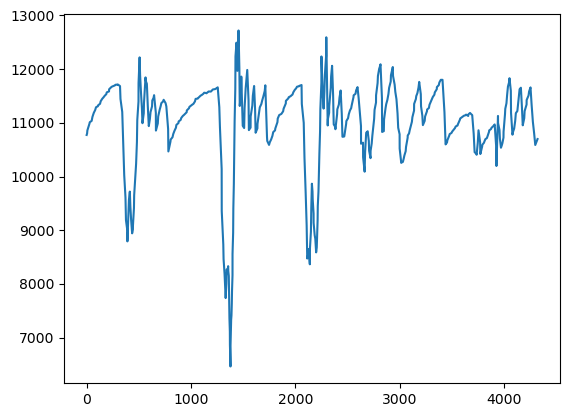

In [70]:
plt.plot(test['qualifying_Distance'],test['qualifying_RPM'])

In [71]:
races = qualifying_df['raceId'].unique()
for race in races:
    print(race)
    drivers = qualifying_df.loc[qualifying_df['raceId'] == race,'driverRef'].unique()
    for driver in drivers:
        #print(driver)
        laps = qualifying_df.loc[(qualifying_df['raceId'] == race) & (qualifying_df['driverRef'] == driver),'qualifying_lapId'].unique()
        max_max_rpm=[]     
        straight_var_rpm=[]
        straight_mean_rpm =[]
        fastestlap_query = (qualifying_df['raceId']==race)& (qualifying_df['driverRef'] == driver) & ((qualifying_df['qualifying_LapTime']*1000)==qualifying_df['fastest_lap_milliseconds_clean']) 
        for lap in laps:
            lap_query=(qualifying_df['raceId']==race)& (qualifying_df['driverRef'] == driver) &(qualifying_df['qualifying_lapId'] == lap)
            if qualifying_df.loc[lap_query,'qualifying_TrackStatus'].all() == 1:  
                max_rpm,mean_straight_rpm, var_straight_rpm= rpm(qualifying_df[lap_query].copy())
                max_max_rpm.append(np.mean(max_rpm))            
                straight_mean_rpm.append(np.mean(mean_straight_rpm))
                straight_var_rpm.append(np.mean(var_straight_rpm))
            max_rpm_fl,mean_straight_rpm_fl, var_straight_rpm_fl= rpm(qualifying_df[fastestlap_query].copy())
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'max_fastest_lap_rpm'] =int(max_rpm_fl)
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'var_fastest_lap_straight_rpm'] = int(np.mean(var_straight_rpm_fl))
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'mean_fastest_lap_straight_rpm'] = int(np.mean(mean_straight_rpm_fl))
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'max_max_rpm'] = int(np.max(max_max_rpm))
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'mean_var_straight_rpm'] = int(np.mean(straight_var_rpm))
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'mean_straight_rpm'] = int(np.mean(straight_mean_rpm))

997
1004
1000
994
993
1018
1025
1021
1015
1014


In [72]:
qualifying_aggr

,raceId,driverRef,circuitRef,country,nationality_drivers,constructorRef,nationality_constructors,year,lat_x,lng_x,...,min_fastest_accleration,mean_top_lap_accleration,mean_var_lap_accleration,mean_min_lap_accleration,max_fastest_lap_rpm,var_fastest_lap_straight_rpm,mean_fastest_lap_straight_rpm,max_max_rpm,mean_var_straight_rpm,mean_straight_rpm
0,993,alonso,catalunya,Spain,Spain,mclaren,UK,2018.0,41.5700,2.26111,...,1.0,51.0,13.0,6.0,11866.0,503.0,10775.0,12107.0,562.0,10747.0
1,993,bottas,catalunya,Spain,Finland,mercedes,Germany,2018.0,41.5700,2.26111,...,1.0,48.0,12.0,7.0,12187.0,736.0,10952.0,12536.0,903.0,10537.0
2,993,ericsson,catalunya,Spain,Sweden,sauber,Switzerland,2018.0,41.5700,2.26111,...,9.0,53.0,12.0,15.0,12417.0,663.0,11073.0,12740.0,994.0,10756.0
3,993,gasly,catalunya,Spain,France,toro_rosso,Italy,2018.0,41.5700,2.26111,...,1.0,48.0,12.0,10.0,12441.0,510.0,10771.0,12865.0,682.0,10704.0
4,993,grosjean,catalunya,Spain,France,haas,USA,2018.0,41.5700,2.26111,...,0.0,50.0,12.0,10.0,12300.0,568.0,11106.0,12603.0,733.0,10801.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,1025,ricciardo,sochi,Russia,Australia,renault,France,2019.0,43.4057,39.95780,...,27.0,51.0,6.0,29.0,11952.0,464.0,11022.0,12144.0,492.0,10928.0
193,1025,russell,sochi,Russia,UK,williams,UK,2019.0,43.4057,39.95780,...,25.0,45.0,8.0,19.0,12316.0,754.0,10976.0,12803.0,904.0,10762.0
194,1025,sainz,sochi,Russia,Spain,mclaren,UK,2019.0,43.4057,39.95780,...,29.0,49.0,7.0,24.0,11713.0,716.0,10859.0,11868.0,945.0,10622.0
195,1025,stroll,sochi,Russia,Canada,racing_point,UK,2019.0,43.4057,39.95780,...,3.0,50.0,9.0,19.0,12467.0,519.0,11195.0,12760.0,710.0,10921.0


## Gears

In [73]:
qualifying_df['qualifying_nGear']

0          7.0
1          7.0
2          7.0
3          8.0
4          8.0
          ... 
1005379    7.0
1005380    7.0
1005381    7.0
1005382    7.0
1005383    7.0
Name: qualifying_nGear, Length: 1005384, dtype: float64

In [74]:
qualifying_df['qualifying_nGear'].describe()

count    1.005384e+06
mean     4.628182e+00
std      1.942573e+00
min      0.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      6.000000e+00
max      8.000000e+00
Name: qualifying_nGear, dtype: float64

In [75]:
races = qualifying_df['raceId'].unique()
for race in races:
    print(race)
    drivers = qualifying_df.loc[qualifying_df['raceId'] == race,'driverRef'].unique()
    for driver in drivers:
        #print(driver)
        laps = qualifying_df.loc[(qualifying_df['raceId'] == race) & (qualifying_df['driverRef'] == driver),'qualifying_lapId'].unique()
        gear_1_times=[]
        gear_2_times=[]  
        gear_3_times=[]  
        gear_4_times=[]  
        gear_5_times=[]  
        gear_6_times=[]  
        gear_7_times=[]  
        gear_8_times=[]       
    
        fastestlap_query = (qualifying_df['raceId']==race)& (qualifying_df['driverRef'] == driver) & ((qualifying_df['qualifying_LapTime']*1000)==qualifying_df['fastest_lap_milliseconds_clean']) 
        for lap in laps:
            lap_query=(qualifying_df['raceId']==race)& (qualifying_df['driverRef'] == driver) &(qualifying_df['qualifying_lapId'] == lap)
            if qualifying_df.loc[lap_query,'qualifying_TrackStatus'].all() == 1:                
                gear_dict= gear_data(qualifying_df[lap_query].copy())
                gear_1_times.append(np.mean(gear_dict['gear_1']))            
                gear_2_times.append(np.mean(gear_dict['gear_2']))
                gear_3_times.append(np.mean(gear_dict['gear_3']))
                gear_4_times.append(np.mean(gear_dict['gear_4']))            
                gear_5_times.append(np.mean(gear_dict['gear_5']))
                gear_6_times.append(np.mean(gear_dict['gear_6']))
                gear_7_times.append(np.mean(gear_dict['gear_7']))
                gear_8_times.append(np.mean(gear_dict['gear_8']))
        gear_dict_fl= gear_data(qualifying_df[fastestlap_query].copy())
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'avg_gear1_time'] =int(np.mean(gear_1_times))
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'avg_gear2_time'] = int(np.mean(gear_2_times))
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'avg_gear3_time'] = int(np.mean(gear_3_times))
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'avg_gear4_time'] = int(np.mean(gear_4_times))
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'avg_gear5_time'] = int(np.mean(gear_5_times))
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'avg_gear6_time'] = int(np.mean(gear_6_times))
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'avg_gear7_time'] = int(np.mean(gear_7_times))
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'avg_gear8_time'] = int(np.mean(gear_8_times))
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'avg_gear1_time_fl'] =int(np.mean(gear_dict_fl['gear_1']))
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'avg_gear2_time_fl'] = int(np.mean(gear_dict_fl['gear_2']))
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'avg_gear3_time_fl'] = int(np.mean(gear_dict_fl['gear_3']))
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'avg_gear4_time_fl'] = int(np.mean(gear_dict_fl['gear_4']))
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'avg_gear5_time_fl'] = int(np.mean(gear_dict_fl['gear_5']))
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'avg_gear6_time_fl'] = int(np.mean(gear_dict_fl['gear_6']))
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'avg_gear7_time_fl'] = int(np.mean(gear_dict_fl['gear_7']))
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'avg_gear8_time_fl'] = int(np.mean(gear_dict_fl['gear_8']))

997
1004
1000
994
993
1018
1025
1021
1015
1014


In [76]:
qualifying_aggr

,raceId,driverRef,circuitRef,country,nationality_drivers,constructorRef,nationality_constructors,year,lat_x,lng_x,...,avg_gear7_time,avg_gear8_time,avg_gear1_time_fl,avg_gear2_time_fl,avg_gear3_time_fl,avg_gear4_time_fl,avg_gear5_time_fl,avg_gear6_time_fl,avg_gear7_time_fl,avg_gear8_time_fl
0,993,alonso,catalunya,Spain,Spain,mclaren,UK,2018.0,41.5700,2.26111,...,14.0,13.0,0.0,2.0,7.0,13.0,6.0,9.0,16.0,14.0
1,993,bottas,catalunya,Spain,Finland,mercedes,Germany,2018.0,41.5700,2.26111,...,10.0,12.0,0.0,0.0,9.0,15.0,8.0,8.0,13.0,14.0
2,993,ericsson,catalunya,Spain,Sweden,sauber,Switzerland,2018.0,41.5700,2.26111,...,9.0,10.0,0.0,3.0,7.0,16.0,9.0,13.0,13.0,11.0
3,993,gasly,catalunya,Spain,France,toro_rosso,Italy,2018.0,41.5700,2.26111,...,8.0,8.0,0.0,0.0,11.0,20.0,7.0,12.0,10.0,12.0
4,993,grosjean,catalunya,Spain,France,haas,USA,2018.0,41.5700,2.26111,...,10.0,11.0,0.0,2.0,7.0,15.0,8.0,8.0,15.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,1025,ricciardo,sochi,Russia,Australia,renault,France,2019.0,43.4057,39.95780,...,12.0,14.0,0.0,0.0,10.0,20.0,12.0,18.0,11.0,14.0
193,1025,russell,sochi,Russia,UK,williams,UK,2019.0,43.4057,39.95780,...,13.0,11.0,0.0,0.0,12.0,18.0,12.0,12.0,13.0,16.0
194,1025,sainz,sochi,Russia,Spain,mclaren,UK,2019.0,43.4057,39.95780,...,22.0,15.0,0.0,0.0,10.0,11.0,9.0,13.0,22.0,18.0
195,1025,stroll,sochi,Russia,Canada,racing_point,UK,2019.0,43.4057,39.95780,...,15.0,13.0,0.0,0.0,9.0,19.0,13.0,13.0,14.0,16.0


## Driver Characteristics

In [77]:
races = qualifying_df['raceId'].unique()
for race in races:
    print(race)
    drivers = qualifying_df.loc[qualifying_df['raceId'] == race,'driverRef'].unique()
    for driver in drivers:
        #print(driver)
        laps = qualifying_df.loc[(qualifying_df['raceId'] == race) & (qualifying_df['driverRef'] == driver),'qualifying_lapId'].unique()
        lap_time_on_brakes=[]
        lap_distance_on_brakes=[]
        lap_bottom_speed =[]
        lap_max_corner_speed =[]
        lap_bottom_speed_tightness_corner =[]
        drs_open_time=[]
        drs_open_distance=[]
        for lap in laps:
            lap_query=(qualifying_df['raceId']==race)& (qualifying_df['driverRef'] == driver) &(qualifying_df['qualifying_lapId'] == lap)
            if qualifying_df.loc[lap_query,'qualifying_TrackStatus'].all() == 1:
                drs_time,drs_distance=DRS_open(qualifying_df[lap_query].copy())
                drs_open_distance.append(drs_distance)
                drs_open_time.append(drs_time)
                bottom_speed,max_corner_speed,bottom_speed_tightness_corner=driver_corners(qualifying_df[lap_query].copy())
                lap_bottom_speed_tightness_corner.append(bottom_speed_tightness_corner)
                lap_bottom_speed.append(np.mean(bottom_speed))
                lap_max_corner_speed.append(np.max(max_corner_speed))
                time_on_brakes, distance_on_brakes=driver_brake(qualifying_df[lap_query].copy())
                lap_time_on_brakes.append(time_on_brakes)
                lap_distance_on_brakes.append(distance_on_brakes)
        fastestlap_query = (qualifying_df['raceId']==race)& (qualifying_df['driverRef'] == driver) & ((qualifying_df['qualifying_LapTime']*1000)==qualifying_df['fastest_lap_milliseconds_clean']) 
        fl_time_on_brakes, fl_distance_on_brakes=driver_brake(qualifying_df[fastestlap_query].copy())
        fl_drs_time,fl_drs_distance=DRS_open(qualifying_df[fastestlap_query].copy())
        fl_bottom_speed,fl_max_corner_speed,bottom_speed_tightness_corner=driver_corners(qualifying_df[fastestlap_query].copy())
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'avg_lap_time_on_brake'] =int(np.mean(lap_time_on_brakes))
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'avg_lap_distance_on_brake'] = int(np.mean(lap_distance_on_brakes))
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'avg_lap_time_on_DRS'] = int(np.mean(drs_open_time))
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'avg_lap_distance_on_DRS'] = int(np.mean(drs_open_distance))
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'avg_lap_bottom_speed_corner'] = int(np.mean(lap_bottom_speed))
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'avg_lap_max_speed_corner'] = int(np.mean(lap_max_corner_speed))
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'avg_lap_bottom_speed_tightest_corner'] = int(np.mean(lap_bottom_speed_tightness_corner))

        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'fl_lap_time_on_brake'] =int(fl_time_on_brakes)
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'fl_lap_distance_on_brake'] = int(fl_distance_on_brakes)
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'fl_lap_time_on_DRS'] = int(fl_drs_time)
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'fl_lap_distance_on_DRS'] = int(fl_drs_distance)
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'fl_lap_bottom_speed_corner'] = int(np.mean(fl_bottom_speed))
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'fl_lap_max_speed_corner'] = int(np.max(fl_max_corner_speed))
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'fl_lap_bottom_speed_tightest_corner'] = int(bottom_speed_tightness_corner)
        

997
1004
1000
994
993
1018
1025
1021
1015
1014


In [78]:
qualifying_aggr

,raceId,driverRef,circuitRef,country,nationality_drivers,constructorRef,nationality_constructors,year,lat_x,lng_x,...,avg_lap_bottom_speed_corner,avg_lap_max_speed_corner,avg_lap_bottom_speed_tightest_corner,fl_lap_time_on_brake,fl_lap_distance_on_brake,fl_lap_time_on_DRS,fl_lap_distance_on_DRS,fl_lap_bottom_speed_corner,fl_lap_max_speed_corner,fl_lap_bottom_speed_tightest_corner
0,993,alonso,catalunya,Spain,Spain,mclaren,UK,2018.0,41.5700,2.26111,...,148.0,266.0,88.0,13.0,589.0,15.0,1245.0,154.0,270.0,88.0
1,993,bottas,catalunya,Spain,Finland,mercedes,Germany,2018.0,41.5700,2.26111,...,143.0,260.0,90.0,10.0,527.0,14.0,1216.0,160.0,277.0,92.0
2,993,ericsson,catalunya,Spain,Sweden,sauber,Switzerland,2018.0,41.5700,2.26111,...,133.0,262.0,81.0,11.0,563.0,14.0,1195.0,151.0,274.0,82.0
3,993,gasly,catalunya,Spain,France,toro_rosso,Italy,2018.0,41.5700,2.26111,...,139.0,255.0,80.0,11.0,546.0,14.0,1236.0,154.0,268.0,91.0
4,993,grosjean,catalunya,Spain,France,haas,USA,2018.0,41.5700,2.26111,...,142.0,265.0,78.0,12.0,567.0,14.0,1222.0,156.0,276.0,107.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,1025,ricciardo,sochi,Russia,Australia,renault,France,2019.0,43.4057,39.95780,...,159.0,288.0,137.0,11.0,601.0,19.0,1625.0,158.0,288.0,176.0
193,1025,russell,sochi,Russia,UK,williams,UK,2019.0,43.4057,39.95780,...,139.0,256.0,104.0,14.0,747.0,18.0,1597.0,155.0,285.0,112.0
194,1025,sainz,sochi,Russia,Spain,mclaren,UK,2019.0,43.4057,39.95780,...,150.0,277.0,130.0,12.0,624.0,20.0,1687.0,164.0,284.0,118.0
195,1025,stroll,sochi,Russia,Canada,racing_point,UK,2019.0,43.4057,39.95780,...,142.0,273.0,125.0,14.0,756.0,19.0,1613.0,155.0,288.0,161.0


## Tyres

In [79]:
qualifying_df['qualifying_Compound'].value_counts()

SOFT            466598
HYPERSOFT       195040
ULTRASOFT       147808
SUPERSOFT        77566
INTERMEDIATE     46879
WET              38527
MEDIUM           32966
Name: qualifying_Compound, dtype: int64

In [80]:
qualifying_df['qualifying_FreshTyre'].value_counts()

True     976118
False     29266
Name: qualifying_FreshTyre, dtype: int64

Qualifying mostly fresh tyre unlikely to be useful metric

In [81]:
qualifying_df['qualifying_TyreLife'].describe()

count    1.005384e+06
mean     3.034159e+00
std      1.484089e+00
min      1.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      4.000000e+00
max      1.400000e+01
Name: qualifying_TyreLife, dtype: float64

In [82]:
races = qualifying_df['raceId'].unique()
for race in races:
    print(race)
    drivers = qualifying_df.loc[qualifying_df['raceId'] == race,'driverRef'].unique()
    for driver in drivers:
        fastestlap_query = (qualifying_df['raceId']==race)& (qualifying_df['driverRef'] == driver) & ((qualifying_df['qualifying_LapTime']*1000)==qualifying_df['fastest_lap_milliseconds_clean'])
        fastestlap_tyre = (qualifying_df.loc[fastestlap_query,'qualifying_Compound'].mode().values[0])
        fastestlap_tyre_life=(qualifying_df.loc[fastestlap_query,'qualifying_TyreLife'].mean())
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'fl_tyre'] =fastestlap_tyre
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'fl_tyre_life'] = fastestlap_tyre_life

997
1004
1000
994
993
1018
1025
1021
1015
1014


## sector time aggregate

In [83]:
qualifying_df['qualifying_Sector1Time'].describe()

count    1.005384e+06
mean     2.604043e+01
std      7.764839e+00
min      1.595200e+01
25%      1.936200e+01
50%      2.378300e+01
75%      3.272900e+01
max      5.622300e+01
Name: qualifying_Sector1Time, dtype: float64

In [84]:
races = qualifying_df['raceId'].unique()
for race in races:
    print(race)
    drivers = qualifying_df.loc[qualifying_df['raceId'] == race,'driverRef'].unique()
    for driver in drivers:
        laps = qualifying_df.loc[(qualifying_df['raceId'] == race) & (qualifying_df['driverRef'] == driver),'qualifying_lapId'].unique()
        avg_Sector1=[]
        avg_Sector2=[]
        avg_Sector3=[]
        for lap in laps:
            lap_query=(qualifying_df['raceId']==race)& (qualifying_df['driverRef'] == driver) &(qualifying_df['qualifying_lapId'] == lap)
            if qualifying_df.loc[lap_query,'qualifying_TrackStatus'].all() == 1:
                avg_Sector1.append(qualifying_df.loc[lap_query,'qualifying_Sector1Time'].mean())
                avg_Sector2.append(qualifying_df.loc[lap_query,'qualifying_Sector2Time'].mean())
                avg_Sector3.append(qualifying_df.loc[lap_query,'qualifying_Sector3Time'].mean())
        fastestlap_query = (qualifying_df['raceId']==race)& (qualifying_df['driverRef'] == driver) & ((qualifying_df['qualifying_LapTime']*1000)==qualifying_df['fastest_lap_milliseconds_clean'])
        fastestlap_Sector1 = (qualifying_df.loc[fastestlap_query,'qualifying_Sector1Time'].mean())
        fastestlap_Sector2=(qualifying_df.loc[fastestlap_query,'qualifying_Sector2Time'].mean())
        fastestlap_Sector3=(qualifying_df.loc[fastestlap_query,'qualifying_Sector3Time'].mean())
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'fastestlap_Sector1'] =fastestlap_Sector1
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'fastestlap_Sector2'] = fastestlap_Sector2
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'fastestlap_Sector3'] = fastestlap_Sector3
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'avglap_Sector1'] =np.mean(avg_Sector1)
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'avglap_Sector2'] = np.mean(avg_Sector2)
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'avglap_Sector3'] = np.mean(avg_Sector3)
        

997
1004
1000
994
993
1018
1025
1021
1015
1014


In [85]:
qualifying_aggr


,raceId,driverRef,circuitRef,country,nationality_drivers,constructorRef,nationality_constructors,year,lat_x,lng_x,...,fl_lap_max_speed_corner,fl_lap_bottom_speed_tightest_corner,fl_tyre,fl_tyre_life,fastestlap_Sector1,fastestlap_Sector2,fastestlap_Sector3,avglap_Sector1,avglap_Sector2,avglap_Sector3
0,993,alonso,catalunya,Spain,Spain,mclaren,UK,2018.0,41.5700,2.26111,...,270.0,88.0,SOFT,2.0,22.119,28.913,26.689,22.835222,30.568444,28.153444
1,993,bottas,catalunya,Spain,Finland,mercedes,Germany,2018.0,41.5700,2.26111,...,277.0,92.0,SUPERSOFT,2.0,21.528,28.366,26.319,23.765333,31.612500,30.362000
2,993,ericsson,catalunya,Spain,Sweden,sauber,Switzerland,2018.0,41.5700,2.26111,...,274.0,82.0,SUPERSOFT,4.0,22.383,29.750,27.360,24.981800,36.156200,30.434600
3,993,gasly,catalunya,Spain,France,toro_rosso,Italy,2018.0,41.5700,2.26111,...,268.0,91.0,SUPERSOFT,2.0,22.119,29.501,26.843,23.887500,32.403125,29.813000
4,993,grosjean,catalunya,Spain,France,haas,USA,2018.0,41.5700,2.26111,...,276.0,107.0,SOFT,2.0,21.878,29.011,26.810,23.728071,32.493429,29.558929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,1025,ricciardo,sochi,Russia,Australia,renault,France,2019.0,43.4057,39.95780,...,288.0,176.0,SOFT,2.0,34.129,32.170,27.362,34.240667,32.285833,27.613500
193,1025,russell,sochi,Russia,UK,williams,UK,2019.0,43.4057,39.95780,...,285.0,112.0,SOFT,2.0,34.423,32.681,28.252,37.703667,36.613333,31.122333
194,1025,sainz,sochi,Russia,Spain,mclaren,UK,2019.0,43.4057,39.95780,...,284.0,118.0,SOFT,2.0,34.138,31.815,27.269,35.292500,33.726500,31.214250
195,1025,stroll,sochi,Russia,Canada,racing_point,UK,2019.0,43.4057,39.95780,...,288.0,161.0,SOFT,2.0,34.159,32.345,27.729,36.772167,36.066333,31.962333


## Weather

In [86]:
qualifying_df['qualifying_Rainfall'].value_counts()

False    808039
True     197345
Name: qualifying_Rainfall, dtype: int64

In [87]:
qualifying_df['qualifying_Humidity']

0          45.3
1          45.3
2          45.3
3          45.3
4          45.3
           ... 
1005379    58.9
1005380    58.9
1005381    58.9
1005382    58.9
1005383    58.9
Name: qualifying_Humidity, Length: 1005384, dtype: float64

In [88]:
qualifying_df['qualifying_TrackTemp']

0          34.9
1          34.9
2          34.9
3          34.9
4          34.9
           ... 
1005379    31.8
1005380    31.8
1005381    31.8
1005382    31.8
1005383    31.8
Name: qualifying_TrackTemp, Length: 1005384, dtype: float64

In [89]:
races = qualifying_df['raceId'].unique()
for race in races:
    print(race)
    drivers = qualifying_df.loc[qualifying_df['raceId'] == race,'driverRef'].unique()
    for driver in drivers:
        laps = qualifying_df.loc[(qualifying_df['raceId'] == race) & (qualifying_df['driverRef'] == driver),'qualifying_lapId'].unique()
        avg_lap_percentagerainfall=[]
        avg_lap_track_temperature=[]
        avg_lap_humidty=[]
        for lap in laps:
            lap_query=(qualifying_df['raceId']==race)& (qualifying_df['driverRef'] == driver) &(qualifying_df['qualifying_lapId'] == lap)
            if qualifying_df.loc[lap_query,'qualifying_TrackStatus'].all() == 1:
                avg_lap_percentagerainfall.append(qualifying_df.loc[fastestlap_query,'qualifying_Rainfall'].sum()/len(qualifying_df.loc[fastestlap_query,'qualifying_Rainfall'])*100)
                avg_lap_track_temperature.append(qualifying_df.loc[lap_query,'qualifying_TrackTemp'].mean())
                avg_lap_humidty.append(qualifying_df.loc[lap_query,'qualifying_Humidity'].mean())
        fastestlap_query = (qualifying_df['raceId']==race)& (qualifying_df['driverRef'] == driver) & ((qualifying_df['qualifying_LapTime']*1000)==qualifying_df['fastest_lap_milliseconds_clean'])
        fastestlap_percentagerainfall = (qualifying_df.loc[fastestlap_query,'qualifying_Rainfall'].sum()/len(qualifying_df.loc[fastestlap_query,'qualifying_Rainfall'])*100)
        fastestlap_track_temperature=(qualifying_df.loc[fastestlap_query,'qualifying_TrackTemp'].mean())
        fastestlap_humidity=(qualifying_df.loc[fastestlap_query,'qualifying_Humidity'].mean())
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'fastestlap_percentagerainfall'] =fastestlap_percentagerainfall
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'fastestlap_track_temperature'] = fastestlap_track_temperature
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'fastestlap_humidity'] = fastestlap_humidity
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'avg_lap_percentagerainfall'] =np.mean(avg_lap_percentagerainfall)
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'avg_lap_track_temperature'] = np.mean(avg_lap_track_temperature)
        qualifying_aggr.loc[(qualifying_aggr['raceId'] == race) & (qualifying_aggr['driverRef'] == driver) ,'avg_lap_humidty'] = np.mean(avg_lap_humidty)

997
1004
1000
994
993
1018
1025
1021
1015
1014


In [90]:
qualifying_aggr

,raceId,driverRef,circuitRef,country,nationality_drivers,constructorRef,nationality_constructors,year,lat_x,lng_x,...,fastestlap_Sector3,avglap_Sector1,avglap_Sector2,avglap_Sector3,fastestlap_percentagerainfall,fastestlap_track_temperature,fastestlap_humidity,avg_lap_percentagerainfall,avg_lap_track_temperature,avg_lap_humidty
0,993,alonso,catalunya,Spain,Spain,mclaren,UK,2018.0,41.5700,2.26111,...,26.689,22.835222,30.568444,28.153444,100.0,26.4,79.2,100.0,27.255556,77.311111
1,993,bottas,catalunya,Spain,Finland,mercedes,Germany,2018.0,41.5700,2.26111,...,26.319,23.765333,31.612500,30.362000,100.0,26.4,79.2,100.0,26.950000,77.883333
2,993,ericsson,catalunya,Spain,Sweden,sauber,Switzerland,2018.0,41.5700,2.26111,...,27.360,24.981800,36.156200,30.434600,0.0,27.6,76.1,0.0,27.620000,76.440000
3,993,gasly,catalunya,Spain,France,toro_rosso,Italy,2018.0,41.5700,2.26111,...,26.843,23.887500,32.403125,29.813000,100.0,26.8,77.8,100.0,27.462500,76.587500
4,993,grosjean,catalunya,Spain,France,haas,USA,2018.0,41.5700,2.26111,...,26.810,23.728071,32.493429,29.558929,100.0,27.1,77.1,100.0,27.135714,77.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,1025,ricciardo,sochi,Russia,Australia,renault,France,2019.0,43.4057,39.95780,...,27.362,34.240667,32.285833,27.613500,0.0,29.9,58.9,0.0,30.533333,60.000000
193,1025,russell,sochi,Russia,UK,williams,UK,2019.0,43.4057,39.95780,...,28.252,37.703667,36.613333,31.122333,0.0,30.9,60.4,0.0,31.133333,61.166667
194,1025,sainz,sochi,Russia,Spain,mclaren,UK,2019.0,43.4057,39.95780,...,27.269,35.292500,33.726500,31.214250,0.0,29.9,58.9,0.0,30.725000,60.300000
195,1025,stroll,sochi,Russia,Canada,racing_point,UK,2019.0,43.4057,39.95780,...,27.729,36.772167,36.066333,31.962333,0.0,30.6,60.7,0.0,30.966667,60.800000


In [111]:
qualifying_aggr.to_csv('./data/model_data/formula1_2018_2019_5GP_aggregated.csv',index=False)